In [87]:
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn matplotlib
!{sys.executable} -m pip install seaborn imbalanced-learn

# Import necessary libraries
import seaborn as sns  # This helps us make charts
import pandas as pd  # This helps us work with data tables
import numpy as np  # This helps us do math and handle numbers
import matplotlib.pyplot as plt  # This helps us make charts
from imblearn.over_sampling import SMOTE  # NEW: Import SMOTE to balance the data
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV  # These help split data and find best model settings
from sklearn.preprocessing import StandardScaler, LabelEncoder  # These adjust data for the model
from sklearn.linear_model import LogisticRegression  # This is a simple model to predict categories
from sklearn.tree import DecisionTreeClassifier  # This is a tree-based model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # These are advanced models with many trees
from sklearn.metrics import (  # These measure how good our model is
    confusion_matrix, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score, log_loss, roc_auc_score
)
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier  # These help with multiple categories

In [88]:
# Load the dataset
df = pd.read_csv('IRIS.csv')  # This loads our data file about iris flowers
# Display dataset info
print("Dataset Shape:", df.shape)  # This tells us how many rows and columns
print("\nFirst 5 Rows:")
df.head()  # This shows the first 5 rows of the dataset

Dataset Shape: (129, 5)

First 5 Rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())  # This checks if any data is missing


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [90]:
# Check number of classes in label
pd.unique(df['species'])  # This shows the different types of flowers

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [91]:
# Preprocessing
# Encode target variable
if df['species'].dtype == 'object':  # If species is text, change it to numbers
    le = LabelEncoder()  # This turns text into numbers
    df['species'] = le.fit_transform(df['species'])  # Now species is 0, 1, or 2

In [92]:
# Check encoded classes
pd.unique(df['species'])  # This confirms the species are numbers
# array([0, 1, 2])

array([0, 1, 2])

In [93]:
# Check for dataset imbalance
print('number of samples in each class:')  # See how many of each flower type
df['species'].value_counts()  # Counts each class

number of samples in each class:


species
0    50
1    50
2    29
Name: count, dtype: int64

In [94]:
# Balancing dataset
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight  # These help balance the data
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['species']), y=df['species'])  # Calculates weights
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(df['species']), class_weights)}  # Puts weights in a dictionary

In [95]:
# Compute sample weights for each instance
sample_weights = compute_sample_weight(class_weight=class_weights_dict, y=df['species'])  # Assigns weights to each flower
class_weights_dict  # Shows the weights

{np.int64(0): np.float64(0.86),
 np.int64(1): np.float64(0.86),
 np.int64(2): np.float64(1.4827586206896552)}

In [96]:
# Split features and target
X = df.drop('species', axis=1)  # Takes all columns except species
y = df['species']  # This is what we predict

In [97]:
# Feature scaling
scaler = StandardScaler()  # This makes all numbers the same scale
X_scaled = scaler.fit_transform(X)  # Applies the scaling

In [98]:
# Train-test split
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X_scaled, y, sample_weights, test_size=0.3, stratify=y, random_state=42)  
# Splits data into training and testing, keeping balance

In [99]:
# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [100]:
# Check balanced training data
print("After SMOTE, training data counts:", np.bincount(y_train_balanced))  # Should show equal counts (e.g., [35, 35, 35])

After SMOTE, training data counts: [35 35 35]



Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width     species
count    129.000000   129.000000    129.000000   129.000000  129.000000
mean       5.716279     3.057364      3.476744     1.062791    0.837209
std        0.794983     0.453075      1.739231     0.727804    0.768427
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.500000     0.200000    0.000000
50%        5.600000     3.000000      4.000000     1.200000    1.000000
75%        6.300000     3.400000      4.800000     1.600000    1.000000
max        7.700000     4.400000      6.900000     2.500000    2.000000


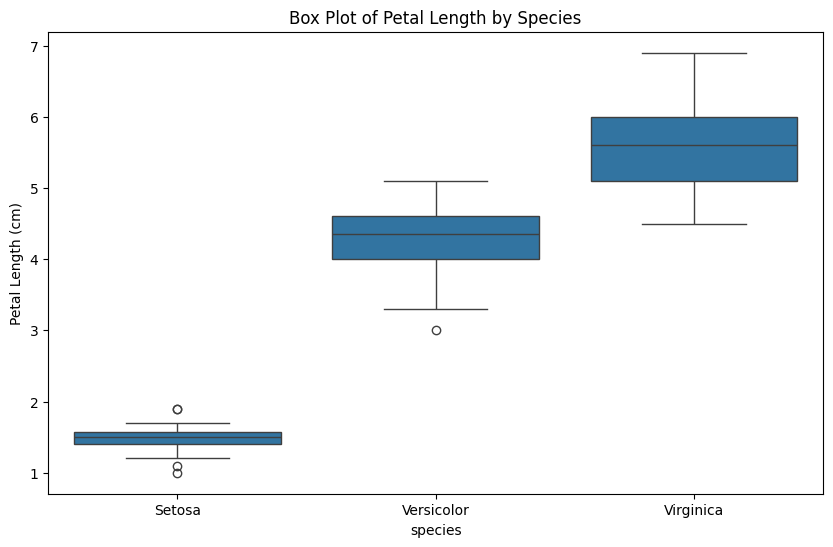

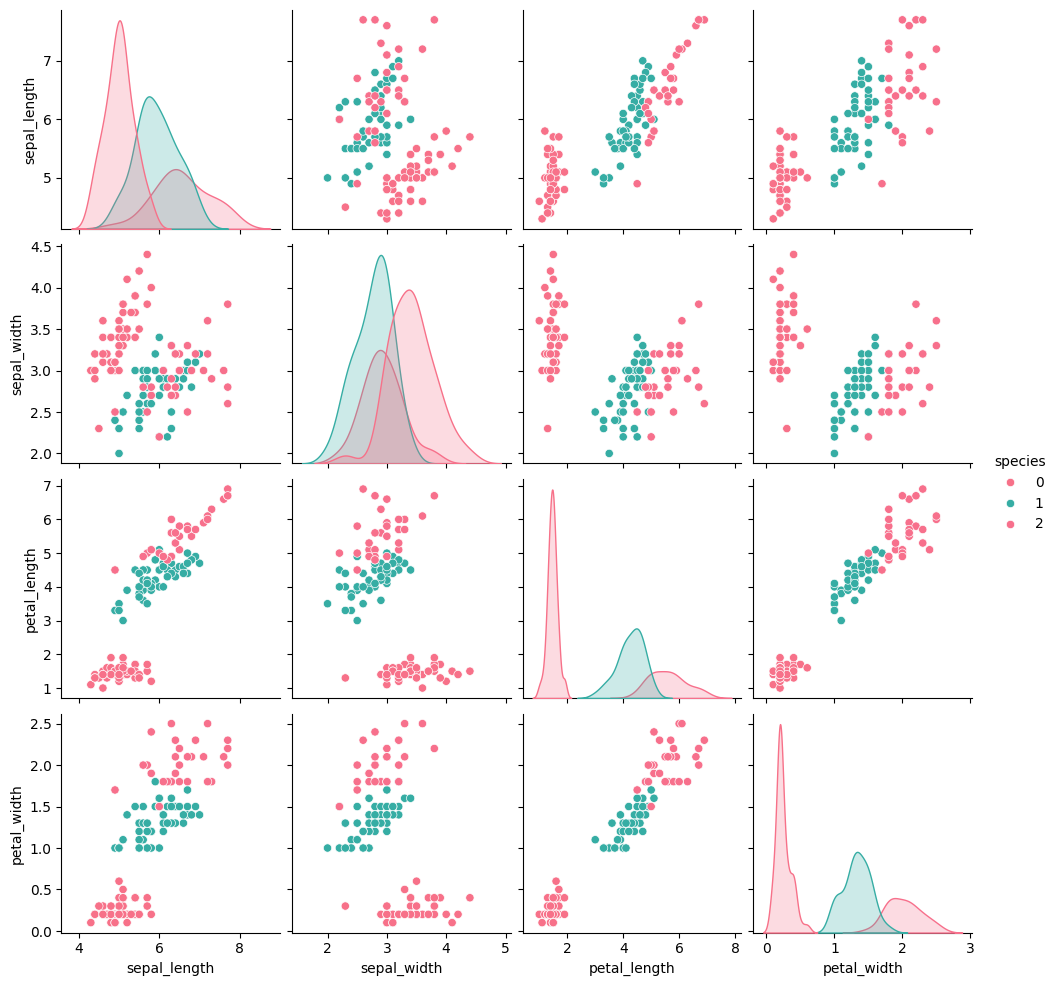

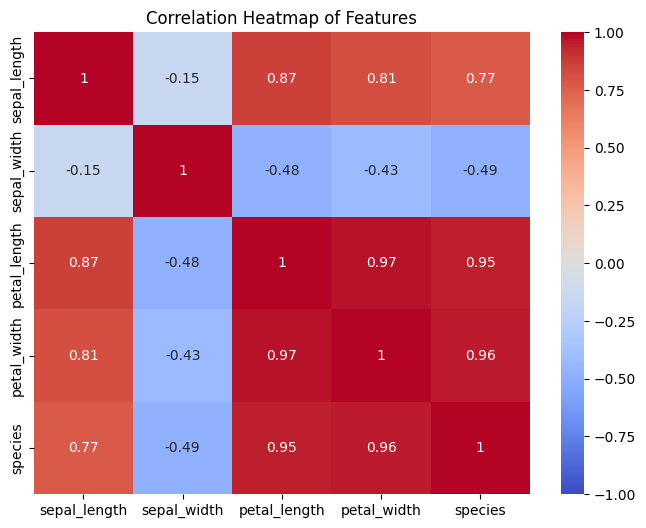


--- Models Without Balancing ---

Logistic Regression (OvR) (Unbalanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.91        39
weighted avg       0.93      0.92      0.92        39

Log Loss: 0.3199743041257806
ROC AUC Score (OvR): 0.9817901234567902


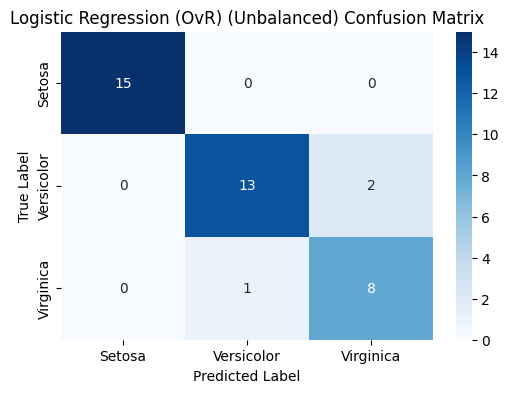


Logistic Regression (OvO) (Unbalanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



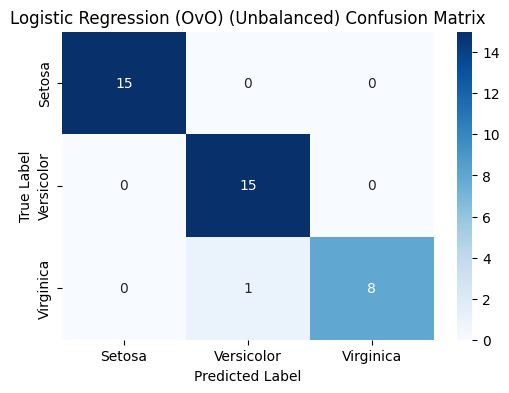


Softmax Regression (Unbalanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.15615029695474325
ROC AUC Score (OvR): 1.0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


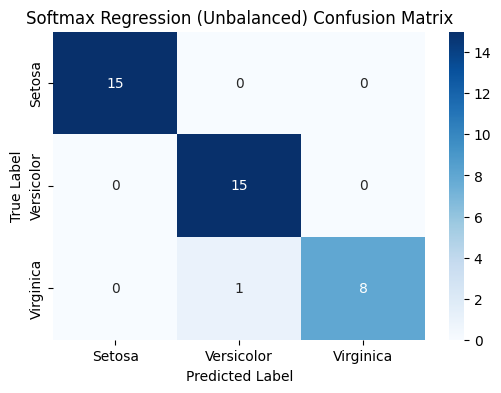


Decision Tree (Unbalanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.9241962407465939
ROC AUC Score (OvR): 0.9745370370370371


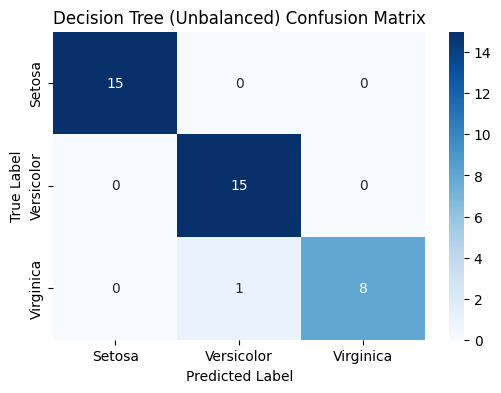


Random Forest (Unbalanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.07900661553394141
ROC AUC Score (OvR): 0.9978395061728396


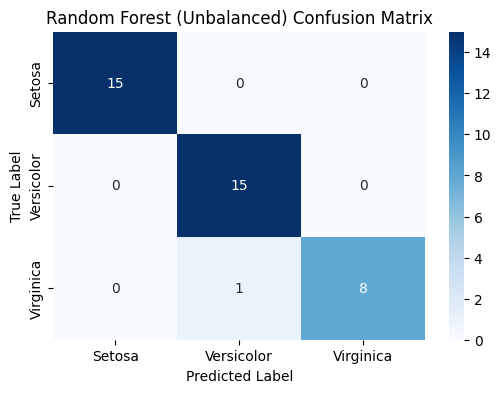


Gradient Boosting (Unbalanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.3427227060355335
ROC AUC Score (OvR): 0.9740740740740742


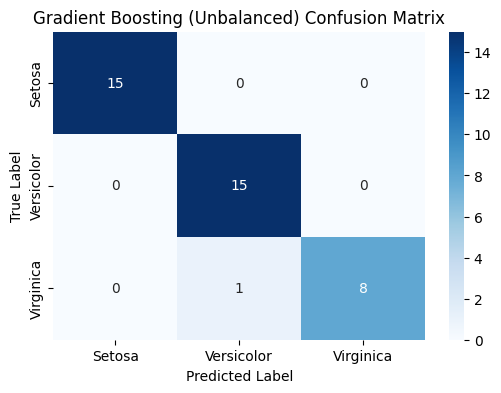


--- Models With SMOTE Balancing ---

Logistic Regression (OvR) (SMOTE Balanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0  9  6]
 [ 0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.60      0.75        15
           2       0.60      1.00      0.75         9

    accuracy                           0.85        39
   macro avg       0.87      0.87      0.83        39
weighted avg       0.91      0.85      0.85        39

Log Loss: 0.35804264056931745
ROC AUC Score (OvR): 0.9685185185185184


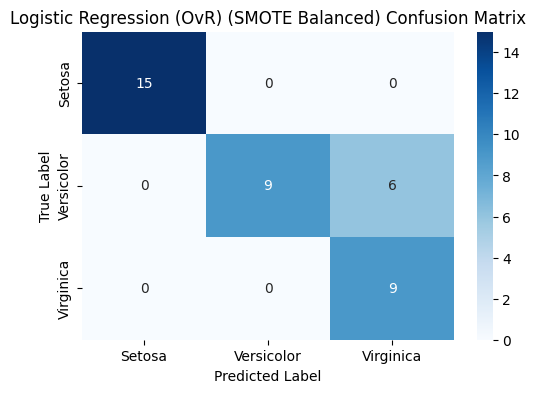


Logistic Regression (OvO) (SMOTE Balanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.89      0.89      0.89         9

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39



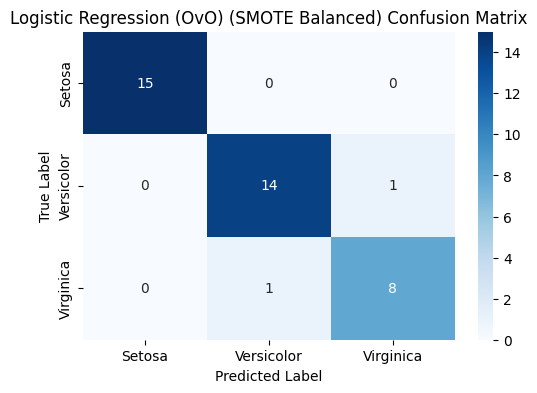


Softmax Regression (SMOTE Balanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.90      1.00      0.95         9

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.1543053304551052
ROC AUC Score (OvR): 0.9987654320987654


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


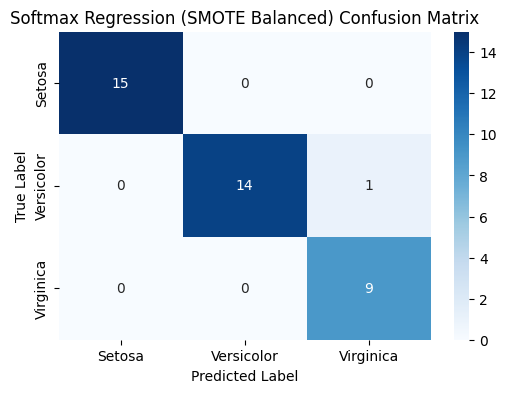


Decision Tree (SMOTE Balanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.9241962407465939
ROC AUC Score (OvR): 0.9745370370370371


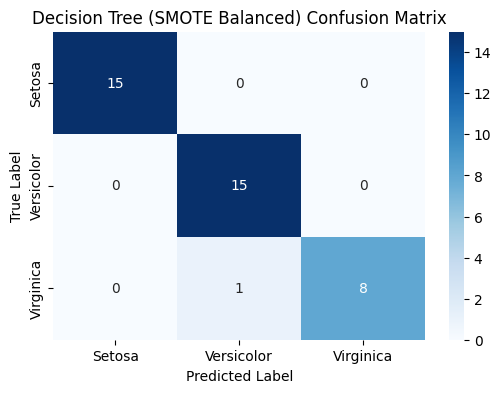


Random Forest (SMOTE Balanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.89      0.89      0.89         9

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39

Log Loss: 0.08378888026434776
ROC AUC Score (OvR): 0.9978395061728396


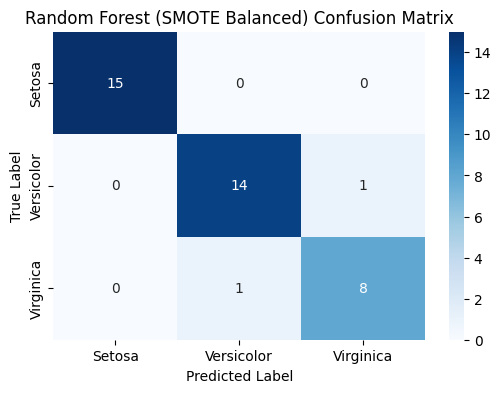


Gradient Boosting (SMOTE Balanced) Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.33268579422236394
ROC AUC Score (OvR): 0.9740740740740742


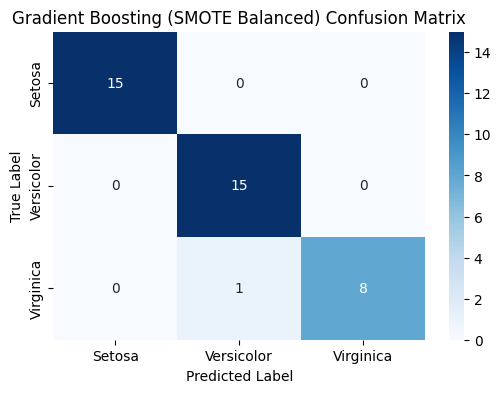

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model Comparison:
                                         Model  Accuracy  Precision    Recall  \
0       Logistic Regression (OvR) (Unbalanced)  0.923077   0.926374  0.923077   
1   Logistic Regression (OvR) (SMOTE Balanced)  0.846154   0.907692  0.846154   
2       Logistic Regression (OvO) (Unbalanced)  0.974359   0.975962  0.974359   
3   Logistic Regression (OvO) (SMOTE Balanced)  0.948718   0.948718  0.948718   
4              Softmax Regression (Unbalanced)  0.974359   0.975962  0.974359   
5          Softmax Regression (SMOTE Balanced)  0.974359   0.976923  0.974359   
6                   Decision Tree (Unbalanced)  0.974359   0.975962  0.974359   
7               Decision Tree (SMOTE Balanced)  0.974359   0.975962  0.974359   
8                   Random Forest (Unbalanced)  0.974359   0.975962  0.974359   
9               Random Forest (SMOTE Balanced)  0.948718   0.948718  0.948718   
10              Gradient Boosting (Unbalanced)  0.974359   0.975962  0.974359   
11       

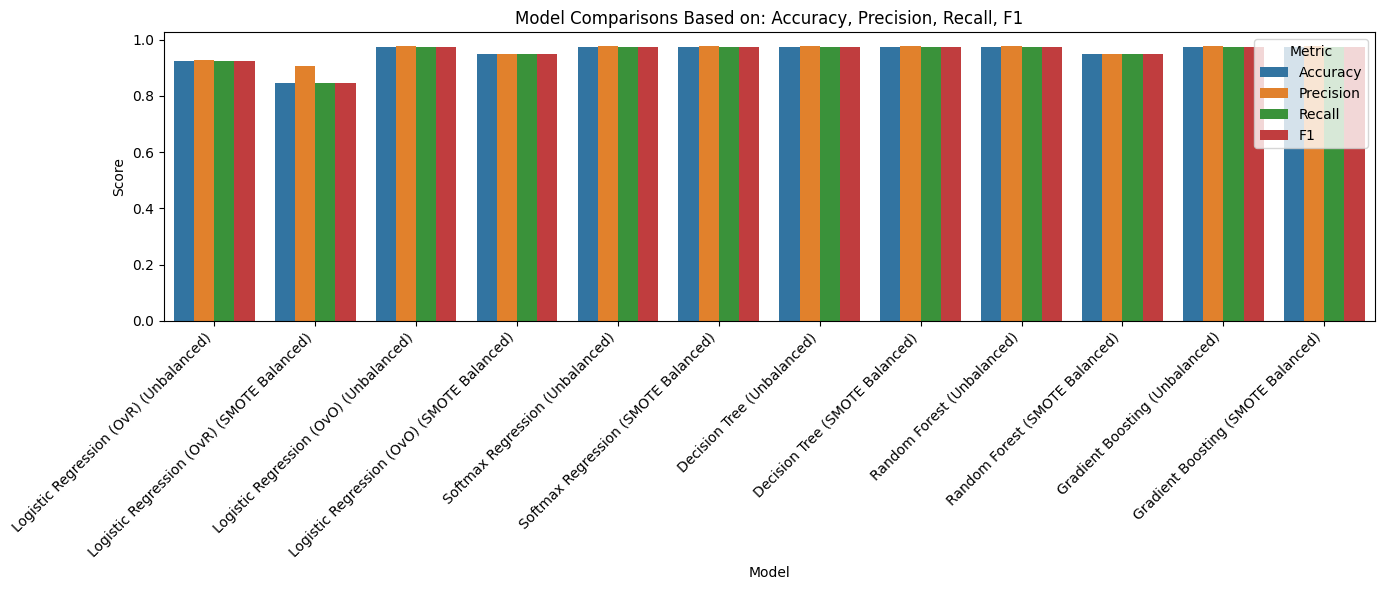

'\nFindings Discussion: \n- Descriptive statistics show petal_length ranges from 1.0 to 6.9 cm, with Virginica having the longest petals (mean ~5.5 cm).\n- The box plot confirms Setosa has short petals (1.4–1.9 cm), while Versicolor and Virginica overlap (3.3–6.9 cm), making these two harder to distinguish.\n- The pair plot shows petal_length and petal_width are the best features for separating species, with Setosa clearly distinct.\n- The correlation heatmap reveals a strong correlation (0.95) between petal_length and petal_width, which helps model performance.\n- Without balancing, most models (except Logistic Regression OvR and SMOTE-balanced Random Forest) achieve high accuracy (~97.4%), but Logistic Regression (OvR) drops to 92% accuracy and 89% recall for Virginica due to class imbalance.\n- Applying SMOTE balancing improves recall for minority classes but may slightly reduce overall accuracy for some models (e.g., Logistic Regression (OvR) drops to 84.6% accuracy).\n- The best o

In [101]:
# Assignment: Perform exploratory data analysis using descriptive statistics and different plots

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())  # Shows stats like petal_length range 1.0–6.9 cm

# Box Plot for Petal Length by Species
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="petal_length", data=df)
plt.title("Box Plot of Petal Length by Species")
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.ylabel("Petal Length (cm)")
plt.show()  # Shows Setosa has short petals (1.4–1.9 cm), Versicolor/Virginica overlap (3.3–6.9 cm)

# Pair Plot for Feature Relationships
sns.pairplot(df, hue="species", palette="husl")
plt.show()  # Shows petal_length and petal_width best separate species

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()  # Shows strong correlation (0.95) between petal_length and petal_width

# Define evaluation function
def evaluate_model(y_true, y_pred, y_proba=None, model_name="Model"):
    print(f"\n{model_name} Performance:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    if y_proba is not None:
        print("Log Loss:", log_loss(y_true, y_proba))
        print("ROC AUC Score (OvR):", roc_auc_score(y_true, y_proba, multi_class='ovr'))
    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'],
                yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Define all models
models = {
    'Logistic Regression (OvR)': OneVsRestClassifier(LogisticRegression(max_iter=10000)),
    'Logistic Regression (OvO)': OneVsOneClassifier(LogisticRegression()),
    'Softmax Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models without balancing (for comparison)
print("\n--- Models Without Balancing ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test)
    evaluate_model(y_test, y_pred, y_proba, f"{name} (Unbalanced)")

# Train and evaluate models with SMOTE balancing
print("\n--- Models With SMOTE Balancing ---")
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test)
    evaluate_model(y_test, y_pred, y_proba, f"{name} (SMOTE Balanced)")

# Model Comparison
metrics = []
for name, model in models.items():
    # Evaluate on unbalanced data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test)
    metrics.append({
        'Model': f"{name} (Unbalanced)",
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Log Loss': 'Not Available' if y_proba is None else log_loss(y_test, y_proba),
        'ROC AUC (OvR)': 'Not Available' if y_proba is None else roc_auc_score(y_test, y_proba, multi_class='ovr')
    })
    # Evaluate on SMOTE-balanced data
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    y_proba = None if name == 'Logistic Regression (OvO)' else model.predict_proba(X_test)
    metrics.append({
        'Model': f"{name} (SMOTE Balanced)",
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Log Loss': 'Not Available' if y_proba is None else log_loss(y_test, y_proba),
        'ROC AUC (OvR)': 'Not Available' if y_proba is None else roc_auc_score(y_test, y_proba, multi_class='ovr')
    })

# Create comparison table
metrics_df = pd.DataFrame(metrics)
print("\nModel Comparison:")
print(metrics_df)

# Visualize Model Comparison
# Melt the DataFrame for easier plotting
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
                                 var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparisons Based on: Accuracy, Precision, Recall, F1')
plt.tight_layout()
plt.show()

'''
Findings Discussion: 
- Descriptive statistics show petal_length ranges from 1.0 to 6.9 cm, with Virginica having the longest petals (mean ~5.5 cm).
- The box plot confirms Setosa has short petals (1.4–1.9 cm), while Versicolor and Virginica overlap (3.3–6.9 cm), making these two harder to distinguish.
- The pair plot shows petal_length and petal_width are the best features for separating species, with Setosa clearly distinct.
- The correlation heatmap reveals a strong correlation (0.95) between petal_length and petal_width, which helps model performance.
- Without balancing, most models (except Logistic Regression OvR and SMOTE-balanced Random Forest) achieve high accuracy (~97.4%), but Logistic Regression (OvR) drops to 92% accuracy and 89% recall for Virginica due to class imbalance.
- Applying SMOTE balancing improves recall for minority classes but may slightly reduce overall accuracy for some models (e.g., Logistic Regression (OvR) drops to 84.6% accuracy).
- The best overall performance is achieved by Softmax Regression, Decision Tree, Gradient Boosting, and Random Forest (Unbalanced), all with 97.4% accuracy and high precision/recall.
- SMOTE balancing does not always improve accuracy but helps models better recognize minority classes.
'''